Instructions
- Apply the Random Forests algorithm but this time only by upscaling the data.
- How much does it cost the company to lose a client? Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? 
- Based on this answer, What's the best error metric to use?

- How would you change your algorithm or data in order to maximize the return of the business?

  1. Test SMOTE instead of random upsampling technique.
  2. Use the gradient boosting technique

In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay


numerical = pd.read_csv('/Users/devirughani/Desktop/Ironhack/Week_7/Day_4/Labs/lab-random-forests/files_for_lab/numerical.csv')
categorical = pd.read_csv('/Users/devirughani/Desktop/Ironhack/Week_7/Day_4/Labs/lab-random-forests/files_for_lab/categorical.csv')
targets = pd.read_csv('/Users/devirughani/Desktop/Ironhack/Week_7/Day_4/Labs/lab-random-forests/files_for_lab/target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [19]:
data.head(10)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [20]:
data.select_dtypes(np.object)

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S
...,...,...,...,...,...,...,...
95407,other,H,M,L,G,C,C
95408,TX,H,M,L,F,A,C
95409,MI,H,M,L,E,B,C
95410,CA,H,F,L,F,A,C


In [21]:


y = data['TARGET_B']
X = data.drop(['TARGET_B','TARGET_D'], axis = 1)


#numericalX = X.select_dtypes(np.number)
#categoricalX = X.select_dtypes(np.object)

#for col in categoricalX.columns:
  #  print(col, categoricalX[col].nunique())
    
# We're going to drop columns "OSOURCE" and "ZIP" because they too many levels.
#categoricalX.drop(columns = ['OSOURCE','ZIP'], axis = 1, inplace = True)

#all_possible_col_values=[]
#for col in categoricalX.columns:
 #   all_possible_col_values.append(list(categoricalX[col].unique()))
    
#all_possible_col_values

In [22]:
# Note: we need to do train/test split before upsampling, and then only upsample the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [23]:
#col_values = [name for sublist in all_possible_col_values for name in sublist]
#print(col_values)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

X_train_cat = X_train.select_dtypes(object)
X_test_cat  = X_test.select_dtypes(object)


encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_categorical_train = encoder.transform(X_train_cat)
encoded_categorical_test  = encoder.transform(X_test_cat)
#print(encoded_categorical.shape)
encoded_categorical_train_df = pd.DataFrame.sparse.from_spmatrix(encoded_categorical_train, index=X_train_cat.index)
encoded_categorical_train_df.columns=encoder.get_feature_names(X_train_cat.columns)
encoded_categorical_test_df  = pd.DataFrame.sparse.from_spmatrix(encoded_categorical_test, index=X_test_cat.index)
encoded_categorical_test_df.columns=encoder.get_feature_names(X_test_cat.columns)

X_train_prescaled = pd.concat([X_train_num, encoded_categorical_train_df], axis = 1)
X_test_prescaled = pd.concat([X_test_num, encoded_categorical_test_df], axis = 1)



## Scaling

In [25]:
scaler = MinMaxScaler()
scaler.fit(X_train_prescaled)
X_train_scaled_np = scaler.transform(X_train_prescaled)
X_test_scaled_np  = scaler.transform(X_test_prescaled)



In [26]:
X_train_normalized_df=pd.DataFrame(X_train_scaled_np, columns=X_train_prescaled.columns, index=X_train_prescaled.index)
X_test_normalized_df=pd.DataFrame(X_test_scaled_np, columns=X_test_prescaled.columns, index=X_test_prescaled.index)

display(X_train_normalized_df.head())
display(X_test_normalized_df.head())

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
79401,0.000017,0.762887,0.500000,0.666667,0.008299,0.000000,0.313131,0.101010,0.686869,0.060606,0.121212,0.034483,1.000000,0.007153,0.009129,0.007683,1.000000,0.0,0.000000,0.474747,0.535354,0.757576,0.212121,0.000000,0.020202,0.020202,0.0,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.017544,0.0,0.023256,0.404762,0.500000,0.547619,0.428571,0.535714,0.583333,0.333333,0.363636,0.474747,0.171717,0.131313,0.212121,0.191919,0.131313,0.151515,0.121212,0.060606,0.141414,0.141414,0.353535,0.212121,0.161616,0.282828,0.090909,0.252525,0.212121,0.383838,0.424242,0.232323,0.101010,0.040404,0.616162,0.101010,0.095890,0.222222,0.272308,0.371429,0.777778,0.757576,0.028571,0.222222,0.202020,0.101010,0.000000,0.000000,0.0,0.105167,0.107333,0.230769,0.230769,0.717172,0.292929,0.939394,0.070707,0.000000,0.343434,0.757576,0.595960,0.242424,0.888889,0.121212,0.101010,0.04,0.080808,0.090909,0.212121,0.040404,0.186667,0.434343,0.191919,0.162791,0.141414,0.012346,0.000000,0.010101,0.040404,0.232323,0.757576,0.000000,0.000000,0.525253,0.635294,0.633333,0.229508,0.100,0.161616,0.060606,0.000000,0.111111,0.090909,0.090909,0.000000,0.030303,0.080808,0.808081,0.929293,0.337607,0.327189,0.643587,0.225333,0.220667,0.238000,0.228667,0.068232,0.101010,0.313131,0.131313,0.212121,0.212121,0.050505,0.00,0.0,0.000000,0.080808,0.333333,0.161616,0.212121,0.161616,0.060606,0.00,0.0,0.000000,0.414141,0.070707,0.575758,0.070707,0.343434,0.666667,0.111111,0.757576,0.202020,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.050505,0.000000,0.050505,0.155556,0.250000,0.050505,0.454545,0.676768,0.666667,0.686869,0.636364,0.686869,0.909091,0.595960,1.000000,1.000000,0.000000,0.272727,0.202020,0.020202,0.101010,0.171717,0.0,0.000000,0.070707,0.000000,0.040404,0.080808,0.028571,0.030303,0.000000,0.00000,0.020202,0.141414,0.100000,0.078125,0.020202,0.222222,0.030303,0.000000

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
58053,0.000483,0.659794,0.833333,1.000000,0.000000,0.000000,0.242424,0.424242,0.222222,0.090909,0.020202,0.011494,1.000000,0.107142,0.137114,0.126825,0.989899,0.0,0.020202,0.474747,0.535354,0.909091,0.020202,0.010101,0.040404,0.090909,0.0,0.013889,0.010101,0.014925,0.000000,0.0,0.000000,0.051546,0.000000,0.012346,0.023256,0.416667,0.500000,0.535714,0.464286,0.559524,0.595238,0.266667,0.474747,0.363636,0.171717,0.090909,0.252525,0.191919,0.121212,0.111111,0.131313,0.121212,0.222222,0.181818,0.313131,0.171717,0.121212,0.333333,0.151515,0.313131,0.262626,0.404040,0.333333,0.181818,0.060606,0.020202,0.636364,0.101010,0.123288,0.181818,0.244615,0.335714,0.656566,0.343434,0.014286,0.272727,0.262626,0.121212,0.000000,0.000000,0.000000,0.325500,0.359167,0.615385,0.615385,0.878788,0.131313,0.939394,0.070707,0.020202,0.272727,0.686869,0.595960,0.232323,0.828283,0.181818,0.040404,0.02,0.030303,0.141414,0.232323,0.060606,0.200000,0.525253,0.232323,0.023256,0.010101,0.000000,0.474747,0.757576,0.898990,0.949495,1.000000,0.101010,0.020202,0.404040,0.600000,0.588889,0.213115,0.100,0.252525,0.020202,0.070707,0.040404,0.020202,0.060606,0.010101,0.888889,0.909091,0.939394,0.949495,0.478632,0.019969,0.911464,0.302667,0.350667,0.318667,0.376000,0.124150,0.151515,0.131313,0.121212,0.161616,0.282828,0.090909,0.04,0.032787,0.020202,0.040404,0.111111,0.111111,0.181818,0.353535,0.121212,0.08,0.020202,0.020202,0.333333,0.030303,0.525253,0.040404,0.616162,0.393939,0.070707,0.808081,0.141414,0.010101,0.010101,0.0,0.0,0.04,0.010101,0.030303,0.000000,0.030303,0.366667,0.486842,0.151515,0.727273,0.646465,0.767677,0.545455,0.727273,0.515152,0.646465,0.454545,0.989899,0.79798,0.020202,0.171717,0.181818,0.040404,0.161616,0.191919,0.000000,0.072727,0.050505,0.010101,0.090909,0.030303,0.014286,0.030303,0.020202,0.000000,0.050505,0.232323,0.033333,0.062500,0.050505,0.141414,0.

## Upsampling

In [27]:
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)
#X_train_over, y_train_over = ros.fit_resample(X_train_normalized_df, y_train)
#display(pd.concat([X_train_over,y_train_over],axis=1).head())

In [28]:
# for upsampling, we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train_normalized_df, y_train], axis=1)


# Manual way to upsampling category 1:
category_1 = trainset[trainset['TARGET_B']==1].sample(len(trainset[trainset['TARGET_B']==0]), replace=True)
print(category_1.shape)

category_0 = trainset[trainset['TARGET_B']== 0 ]
trainset_new = pd.concat([category_0, category_1], axis = 0)  #concat normal df with upsampled df
trainset_new = trainset_new.sample(frac =1) #randomize the rows
X_train_normalized = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
#data = data.reset_index(drop=True)
print(X_train_normalized.shape)


trainset_new['TARGET_B'].value_counts()

(72486, 355)
(144972, 354)


1    72486
0    72486
Name: TARGET_B, dtype: int64

### Conduct random forest 

In [31]:

from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 28)
clf.fit(X_train_over, y_train_over)


print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_normalized, y_train)))
y_pred_train = clf.predict(X_train_normalized)
display(y_train.value_counts())
display(confusion_matrix(y_train, y_pred_train))

print("The accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_normalized_df, y_test)))

y_pred_test = clf.predict(X_test_normalized_df)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_test))


The accuracy for the Random Forest in the TRAIN set is 0.62


1    72486
0    72486
Name: TARGET_B, dtype: int64

array([[44504, 27982],
       [26908, 45578]])

The accuracy for the Random Forest in the TEST  set is 0.61


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[11059,  7024],
       [  455,   545]])

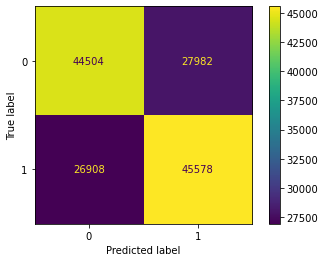

The accuracy for the Random Forest in the TRAIN set is 0.62


In [37]:
import matplotlib.pyplot as plt
cm_train = confusion_matrix(y_train, y_pred_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=clf.classes_)
disp.plot()

plt.show()
print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_normalized, y_train)))

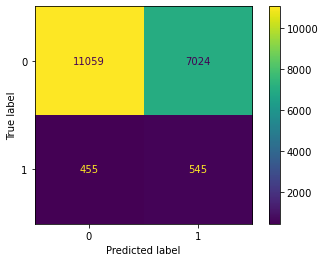

The accuracy for the Random Forest in the TEST  set is 0.61


In [36]:
cm_test = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=clf.classes_)
disp.plot()

plt.show()
print("The accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_normalized_df, y_test)))

False positive is where the person is labelled as replied but hasn't replied
False negative is where the person is labelleed as not replied but did reply

In our business case, the cost of a false negative is a lot higher than a false positive as we can miss out on donations. Hence, 

In [49]:
importances = clf.feature_importances_

In [55]:
X_train_cat.columns

Index(['STATE', 'HOMEOWNR', 'GENDER', 'RFA_2R', 'RFA_2A', 'GEOCODE2',
       'DOMAIN_A'],
      dtype='object')

In [59]:
#np.array(importance )

importances_list=[elem for elem in zip(importances, list(X_train.columns))]
importances_features_df= pd.DataFrame(importances_list)
importances_features_df=importances_features_df.reindex(columns=[1,0]).rename(columns={1:'Feature', 0:'Importance_score'})
importances_features_df.sort_values(by=['Importance_score'], ascending=False)

#  [ (value, X_train.columns[index]) for index, value in enumerate(importances.tolist()) ]
# [ elem for elem in zip(importances, list(X_train.columns))]
# my_list = [ (1.35,'AGE'), (24.7,'STATE_FL'),(23,1,'STATE_AR'),.....].sort()
# pd.DataFrame(my_list).reset_index().reanme(columns={})

,Feature,Importance_score
313,RFA_2F,0.075130
308,LASTGIFT,0.074863
307,MAXRAMNT,0.073426
305,CARDGIFT,0.057364
310,AVGGIFT,0.048947
...,...,...
289,HC16,0.000000
288,HC15,0.000000
32,ETH12,0.000000
99,HHD8,0.000000


In [53]:
importances_features_df

In [ ]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

feature_names = [f"feature {i}" for i in range(X_test.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
# sns.barplot(x="importances", y="col" , data=df, ax = ax)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

X_train_cat = X_train.select_dtypes(object)
X_test_cat  = X_test.select_dtypes(object)


encoder = OneHotEncoder(drop='first',handle_unknown='ignore', categories = all_possible_col_values)
encoder.fit(X_train_cat)
encoded_categorical_train = encoder.transform(X_train_cat).toarray()
encoded_categorical_test  = encoder.transform(X_test_cat).toarray()
#print(encoded_categorical.shape)
encoded_categorical_train_df = pd.DataFrame(encoded_categorical_train, columns = encoder.feature_names_in_)
encoded_categorical_test_df  = pd.DataFrame(encoded_categorical_test, columns = encoder.feature_names_in_)

X_train = pd.concat([X_train_num, encoded_categorical_train_df], axis = 1)
X_test   = pd.concat([X_test_num, encoded_categorical_test_df], axis = 1)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np  = scaler.transform(X_test)